## Task/end-Goal
* Be able to predict an indivuduals gender (Binary; Male or Female) correctly based on certain characteristics

In [2]:
# Importing important Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as knn
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gender_classification_v7.csv')

In [4]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## EDA - Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Grouping the data frame into male and female for comparison of attributes
genders = data.groupby('gender')

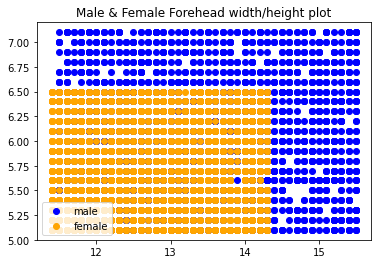

In [9]:
# Breaking data into male and female
male = genders.get_group('Male')
female = genders.get_group('Female')

plt.scatter(male.forehead_width_cm, male.forehead_height_cm, c='blue', label='male')
plt.scatter(female.forehead_width_cm, female.forehead_height_cm, c='orange', label='female')
plt.legend(['male', 'female'], loc = 'lower left')
plt.title('Male & Female Forehead width/height plot')
plt.show()

Forehead width and height are important factors to consider as the plot above suggests; Females tend to have smaller foreheads than male.

In [10]:
print('number of males ',len(male))
print('number of females ',len(female))

number of males  2500
number of females  2501


In [11]:
# Counting number of males and females with wide and narrow nose.
# 0 stands for no/false, 1 stands for true/yes.
nose_wide_count = genders['nose_wide'].value_counts()
nose_wide_count

gender  nose_wide
Female  0            2214
        1             287
Male    1            2183
        0             317
Name: nose_wide, dtype: int64

In [12]:
# Dataframe showing percentage widness/thinness of nose by gender
# using normalize='index' normalizes by dividing all values by the sum of 'index' values.... Calculates percentage
pd.crosstab(data['gender'], data['nose_wide'], normalize='index')

nose_wide,0,1
gender,,
Female,0.885246,0.114754
Male,0.126800,0.873200


* From the table above, the data suggests that males generally have wider nose than females.
Out of 5001 samples comprising of 2500 males and 2501 females
    - 11% of females have wide nose, 88% have narrow nostrils
    - 87% of males have wide nostrils, 12% have narrow nostrils
* Widness of nose is a key factor to consider as there seems to be a polarity in widness of nose for both genders

In [13]:
# Counting number of males and females with long hair
long_hair_count = genders['long_hair'].value_counts()
long_hair_count

gender  long_hair
Female  1            2184
        0             317
Male    1            2165
        0             335
Name: long_hair, dtype: int64

In [14]:
pd.crosstab(data['gender'], data['long_hair'], normalize='index')

long_hair,0,1
gender,,
Female,0.126749,0.873251
Male,0.134000,0.866000


* Hair length is not an important feature to consider as
    - 12% of females have short hair, 87% have long hair
    - 13% of males have short hair, 12% have long hair
* Both genders seem to have the same type of hair length at almost equal percent so hair length is not a determining factor

In [15]:
# Counting number of males and females with long nose
nose_long_count = genders['nose_long'].value_counts()
nose_long_count

gender  nose_long
Female  0            2161
        1             340
Male    1            2200
        0             300
Name: nose_long, dtype: int64

In [16]:
pd.crosstab(data['gender'], data['nose_long'], normalize='index')

nose_long,0,1
gender,,
Female,0.864054,0.135946
Male,0.120000,0.880000


* Length of nose (long/short) is an important feature to consider:
    - 13% of females have long nose, 86% have short nose
    - 88% of males have long nose, 12% have short nose
* There is a polarity in length of nose for both genders. The dataset suggests that males generally have longer nose than females

In [17]:
# Counting number of males and females with thin lips
lips_thin_count = genders['lips_thin'].value_counts()
lips_thin_count

gender  lips_thin
Female  0            2197
        1             304
Male    1            2162
        0             338
Name: lips_thin, dtype: int64

In [18]:
pd.crosstab(data['gender'], data['lips_thin'], normalize='index')

lips_thin,0,1
gender,,
Female,0.878449,0.121551
Male,0.135200,0.864800


* Thinness of lips is an important feature to consider:
    - 12% of females have thin lips, 88% have thick lips
    - 86% of males have thin lips, 12% have thick
* There is a polarity in length of nose for both genders. The dataset suggests that males generally have thiner lips than females.

In [19]:
distance_nose_to_lip_long_count = genders['distance_nose_to_lip_long'].value_counts()
distance_nose_to_lip_long_count

gender  distance_nose_to_lip_long
Female  0                            2197
        1                             304
Male    1                            2191
        0                             309
Name: distance_nose_to_lip_long, dtype: int64

In [20]:
pd.crosstab(data['gender'], data['distance_nose_to_lip_long'], normalize='index')

distance_nose_to_lip_long,0,1
gender,,
Female,0.878449,0.121551
Male,0.123600,0.876400


* Distance of nose to lips is an important feature to consider:
    - 12% of females have long distance between their lips and nose, 88% have short distance
    - 86% of males have long distance between their lips and nose, 12% have short distance
* There is a polarity in distance of nose to lips for both genders. The dataset suggests that males generally have longer distance between their lips and nose as opposed to females.

## FE - Feature Engineering

In [21]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [22]:
# Dropping the long_hair column as it is not a determining factor
data = data.drop('long_hair', axis=1)

# Mapping genders to 0 and 1
gender={
    'Female':0,
    'Male': 1
}
data['gender'] = data['gender'].map(gender)

# splitting data into independent and dependent variables
x = data.drop('gender', axis=1)
y = data['gender']

In [23]:
data.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0


In [24]:
# Splitting data into training and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 32)

## Models Training (Without hyperparameters tuning)

#### Gaussian Naive Bayes

In [25]:
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)


GaussianNB()

In [26]:
NB_predictions = NB_classifier.predict(x_test)
nb_score = r2_score(NB_predictions, y_test)
print('NaiveBayes Classifier prediction score without hyperparameters tuning', round(nb_score, 3)*100,'%')

NaiveBayes Classifier prediction score without hyperparameters tuning 88.4 %


In [27]:
NB_confusion_matrix = confusion_matrix(y_test, NB_predictions)

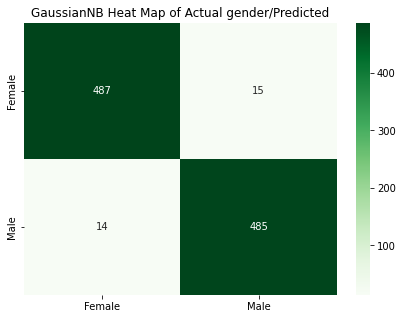

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(NB_confusion_matrix, cmap='Greens', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("GaussianNB Heat Map of Actual gender/Predicted")

plt.show()

#### XGBoost Classifier

In [29]:
XGB_classifier = XGBClassifier(eval_metric= 'logloss')
XGB_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
XGB_predictions = XGB_classifier.predict(x_test)
nb_score = r2_score(XGB_predictions, y_test)
print('XGB Classifier prediction score without hyperparameters tuning', round(nb_score, 3)*100,'%')

XGB Classifier prediction score without hyperparameters tuning 86.8 %


#### SVM Classifier

In [31]:
SVM_classifier = svm.SVC()
SVM_classifier.fit(x_train, y_train)

SVC()

In [32]:
SVM_predictions = SVM_classifier.predict(x_test)
nb_score = r2_score(SVM_predictions, y_test)
print('SVM Classifier prediction score without hyperparameters tuning', round(nb_score, 3)*100,'%')

SVM Classifier prediction score without hyperparameters tuning 90.0 %


#### KNN

In [33]:
KNN_classifier = knn()
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
KNN_predictions = KNN_classifier.predict(x_test)
KNN_score = r2_score(KNN_predictions, y_test)
print('KNN Classifier prediction score without hyperparameters tuning', round(KNN_score, 3)*100,'%')

KNN Classifier prediction score without hyperparameters tuning 82.8 %


## Corss Validation/Hyperparameters tuning

> There will be no hyper parameter tuning for Naive Bayes as there are little to no hypeparameters to adjust

#### Tuned XGBoost Classifier

In [35]:
# Parameters dictionary
params_XGB = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3,4,5,6,7],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,0],
    'gamma': [0, 1, 5],
}

In [137]:
grid_search = GridSearchCV(XGB_classifier, param_grid=params_XGB, n_jobs= -1, verbose=0)
grid_search.fit(x_train, y_train)

In [39]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
#XGBClassifier trained with tuned hyper-paraeters 

XGB_tuned_classifier = XGBClassifier(colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1, eval_metric= 'logloss')

In [36]:
XGB_tuned_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
XGB_tuned_predictions = XGB_tuned_classifier.predict(x_test)
XGB_tuned_score = r2_score(XGB_tuned_predictions, y_test)
print('XGB Classifier prediction score with hyperparameters tuning', round(XGB_tuned_score, 2)*100,'%')

XGB Classifier prediction score with hyperparameters tuning 92.0 %


In [38]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metrics=['logloss', 'auc']
XGB_tuned_classifier.fit(x_train, y_train, eval_metric=eval_metrics, eval_set=eval_set, verbose=True)
results = XGB_tuned_classifier.evals_result()

[0]	validation_0-logloss:0.64024	validation_0-auc:0.87350	validation_1-logloss:0.63731	validation_1-auc:0.89309
[1]	validation_0-logloss:0.59300	validation_0-auc:0.95520	validation_1-logloss:0.59056	validation_1-auc:0.96820
[2]	validation_0-logloss:0.54969	validation_0-auc:0.98343	validation_1-logloss:0.54504	validation_1-auc:0.99051
[3]	validation_0-logloss:0.51143	validation_0-auc:0.99338	validation_1-logloss:0.50674	validation_1-auc:0.99634
[4]	validation_0-logloss:0.49866	validation_0-auc:0.99568	validation_1-logloss:0.49504	validation_1-auc:0.99685
[5]	validation_0-logloss:0.48790	validation_0-auc:0.99615	validation_1-logloss:0.48542	validation_1-auc:0.99647
[6]	validation_0-logloss:0.45807	validation_0-auc:0.99540	validation_1-logloss:0.45630	validation_1-auc:0.99557
[7]	validation_0-logloss:0.43071	validation_0-auc:0.99551	validation_1-logloss:0.42895	validation_1-auc:0.99542
[8]	validation_0-logloss:0.42289	validation_0-auc:0.99567	validation_1-logloss:0.42211	validation_1-auc:

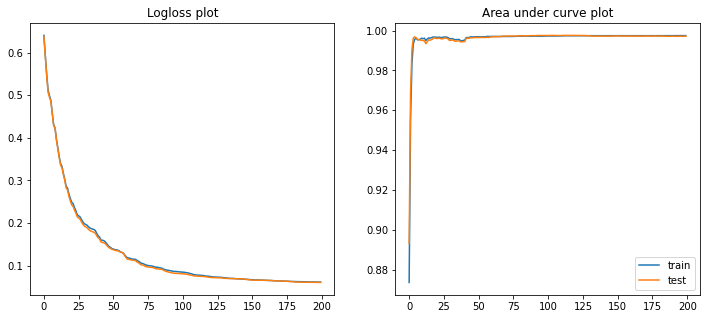

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Logloss plot')
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')

plt.subplot(1,2,2)
plt.title('Area under curve plot')
plt.plot(results['validation_0']['auc'], label='train')
plt.plot(results['validation_1']['auc'], label='test')

plt.legend()
plt.show()

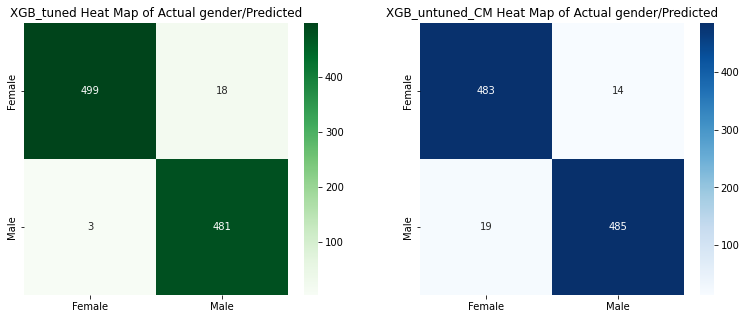

In [40]:
XGB_tuned_CM= confusion_matrix(XGB_tuned_predictions, y_test)
XGB_untuned_CM = confusion_matrix(XGB_predictions, y_test)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(XGB_tuned_CM, cmap='Greens', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("XGB_tuned Heat Map of Actual gender/Predicted")

plt.subplot(1,2,2)
sns.heatmap(XGB_untuned_CM, cmap='Blues', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("XGB_untuned_CM Heat Map of Actual gender/Predicted")

plt.show()

> The tuned model is much more able to generalize as compared to the previous one. Female Classification seems to be more accurate than male as compared to the prior but still, the model is doing a great work.

#### Tuned SVM Classifier

In [41]:
#SVMClassifier trained with tuned hyper-paraeters 

SVM_tuned_classifier = svm.SVC(gamma=0.01, C=0.6, tol=0.04, max_iter=370)
SVM_tuned_classifier.fit(x_train, y_train)

SVC(C=0.6, gamma=0.01, max_iter=370, tol=0.04)

In [42]:
SVM_tuned_predictions = SVM_tuned_classifier.predict(x_test)
SVM_tuned_score = r2_score(SVM_tuned_predictions, y_test)
print('SVM Classifier prediction score with hyperparameters tuning', round(SVM_tuned_score, 2)*100,'%')

SVM Classifier prediction score with hyperparameters tuning 91.0 %


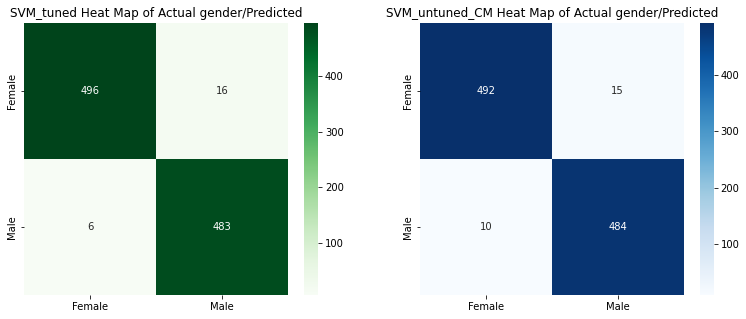

In [43]:
SVM_tuned_CM= confusion_matrix(SVM_tuned_predictions, y_test)
SVM_untuned_CM = confusion_matrix(SVM_predictions, y_test)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(SVM_tuned_CM, cmap='Greens', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("SVM_tuned Heat Map of Actual gender/Predicted")

plt.subplot(1,2,2)
sns.heatmap(SVM_untuned_CM, cmap='Blues', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("SVM_untuned_CM Heat Map of Actual gender/Predicted")

plt.show()

#### Tuned KNN Classifier

In [108]:
params_KNN = {
    'n_neighbors': [50, 60, 70, 80, 90],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 15, 30, 45, 50, 55],
    'p': [1, 2],
}

In [145]:
KNN_random_search = RandomizedSearchCV(KNN_classifier, param_distributions=params_KNN, n_jobs=-300)
KNN_random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-300,
                   param_distributions={'leaf_size': [5, 10, 15, 30, 45, 50,
                                                      55],
                                        'n_neighbors': [50, 60, 70, 80, 90],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [146]:
KNN_random_search.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 80, 'leaf_size': 15}

In [153]:
#KNNClassifier trained with tuned hyper-paraeters 
KNN_tuned_classifier = knn(weights='uniform', p=2, n_neighbors=80, leaf_size=15)
KNN_tuned_classifier.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=15, n_neighbors=80)

In [155]:
KNN_tuned_predictions = KNN_tuned_classifier.predict(x_test)
KNN_tuned_score = r2_score(KNN_tuned_predictions, y_test)
print('KNN Classifier prediction score with hyperparameters tuning', round(KNN_tuned_score, 2)*100,'%')

KNN Classifier prediction score with hyperparameters tuning 91.0 %


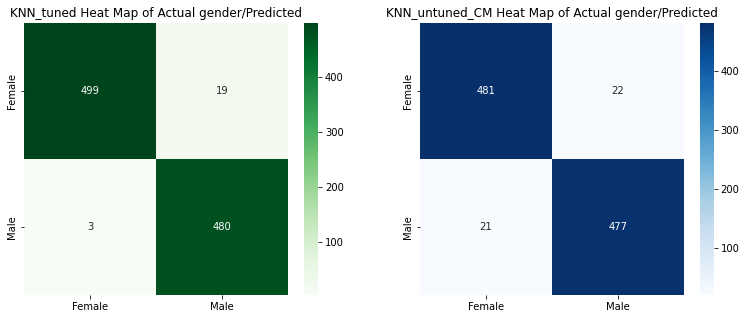

In [156]:
KNN_tuned_CM= confusion_matrix(KNN_tuned_predictions, y_test)
KNN_untuned_CM = confusion_matrix(KNN_predictions, y_test)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(KNN_tuned_CM, cmap='Greens', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("KNN_tuned Heat Map of Actual gender/Predicted")

plt.subplot(1,2,2)
sns.heatmap(KNN_untuned_CM, cmap='Blues', annot=True, fmt='', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male']) #fmt specifies format i.e 2dp percentage, whole number. float
plt.title("KNN_untuned_CM Heat Map of Actual gender/Predicted")

plt.show()

> Each model performed almost equally well.... To increase performance in this situation, proper outier detection and handling is required